<b>Page summary</b>

This page does basic exploratory analysis and basic data preprocessing
<i>
1. Import libraries and load data
2. Exploratory Analysis
3. Data Preprocessing
4. Export Preprocessed Dataframes</i>

--------------------------
<b>1. Import Libraries and Load Data</b>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)

tr_features = pd.read_csv('training_set_features.csv', index_col='respondent_id')
tr_labels = pd.read_csv('training_set_labels.csv',index_col='respondent_id')
ts_data = pd.read_csv('test_set_features.csv',index_col='respondent_id')

#Make sure dataframes are equal
np.testing.assert_array_equal(tr_features.index.values, tr_labels.index.values)

Append train and test df together

In [14]:
np.testing.assert_array_equal(tr_features.index.values, tr_labels.index.values)

In [15]:
merged_df = tr_features.append(ts_data)
df = merged_df.copy()

----------------
<b>2. Exploratory Analysis</b>

In [16]:
tr_features.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [17]:
ts_data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53415 entries, 0 to 53414
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 53238 non-null  float64
 1   h1n1_knowledge               53177 non-null  float64
 2   behavioral_antiviral_meds    53265 non-null  float64
 3   behavioral_avoidance         52994 non-null  float64
 4   behavioral_face_mask         53377 non-null  float64
 5   behavioral_wash_hands        53333 non-null  float64
 6   behavioral_large_gatherings  53256 non-null  float64
 7   behavioral_outside_home      53251 non-null  float64
 8   behavioral_touch_face        53159 non-null  float64
 9   doctor_recc_h1n1             49095 non-null  float64
 10  doctor_recc_seasonal         49095 non-null  float64
 11  chronic_med_condition        51512 non-null  float64
 12  child_under_6_months         51782 non-null  float64
 13  health_worker   

In [19]:
df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,53238.000000,53177.000000,53265.000000,52994.000000,53377.000000,53333.000000,53256.000000,53251.000000,53159.000000,49095.000000,49095.000000,51512.000000,51782.000000,51822.000000,28913.000000,52626.000000,52647.000000,52645.000000,52501.000000,52402.000000,52357.000000,52941.000000,52941.000000
mean,1.620816,1.264287,0.049244,0.727705,0.069131,0.825849,0.355077,0.337271,0.680506,0.221489,0.331643,0.282148,0.084450,0.111709,0.883824,3.847623,2.334701,2.359141,4.025409,2.713923,2.130756,0.890406,0.539166
std,0.906534,0.616881,0.216380,0.445145,0.253679,0.379243,0.478541,0.472783,0.466285,0.415253,0.470808,0.450049,0.278064,0.315012,0.320442,1.007498,1.280608,1.361078,1.084875,1.380553,1.336077,0.753836,0.931626
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


Get null values

In [20]:
nulls = df.isna().sum().sort_values(ascending=False)
nulls

employment_occupation          26896
employment_industry            26605
health_insurance               24502
income_poverty                  8920
doctor_recc_h1n1                4320
doctor_recc_seasonal            4320
rent_or_own                     4078
employment_status               2934
marital_status                  2850
education                       2814
chronic_med_condition           1903
child_under_6_months            1633
health_worker                   1593
opinion_seas_sick_from_vacc     1058
opinion_seas_risk               1013
opinion_seas_vacc_effective      914
opinion_h1n1_vacc_effective      789
opinion_h1n1_sick_from_vacc      770
opinion_h1n1_risk                768
household_adults                 474
household_children               474
behavioral_avoidance             421
behavioral_touch_face            256
h1n1_knowledge                   238
h1n1_concern                     177
behavioral_outside_home          164
behavioral_large_gatherings      159
b

Text(0, 0.5, 'Nulls')

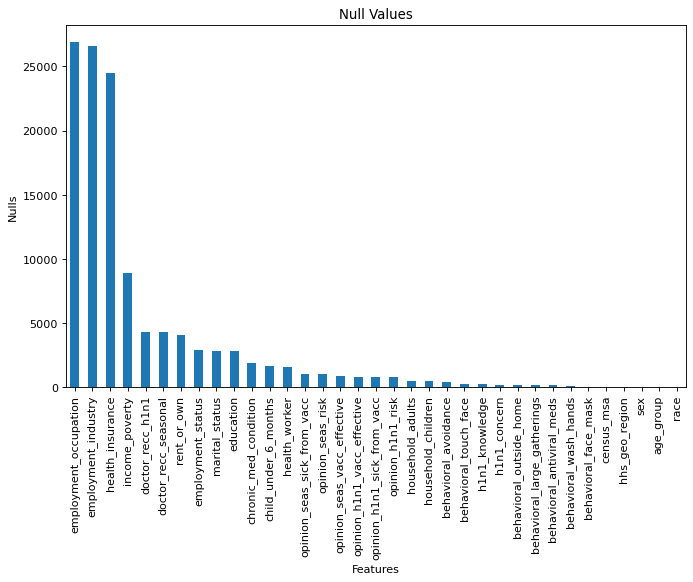

In [21]:
from matplotlib.pyplot import figure

figure(figsize=(10, 6),dpi=80)
nulls.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Null Values')
plt.xlabel('Features')
plt.ylabel('Nulls')

In [22]:
y_seasonal = tr_labels['seasonal_vaccine']
h1n1_vaccine = tr_labels['h1n1_vaccine']

In [23]:
y1_sum = y_seasonal.sum()
y2_sum = h1n1_vaccine.sum()
total = len(y_seasonal)

print('y_seasonal: {0}'.format(y1_sum))
print('y_h1n1: {0}'.format(y2_sum))
print('total: {0}'.format(total))

y_seasonal: 12435
y_h1n1: 5674
total: 26707


Text(0, 0.5, 'Count')

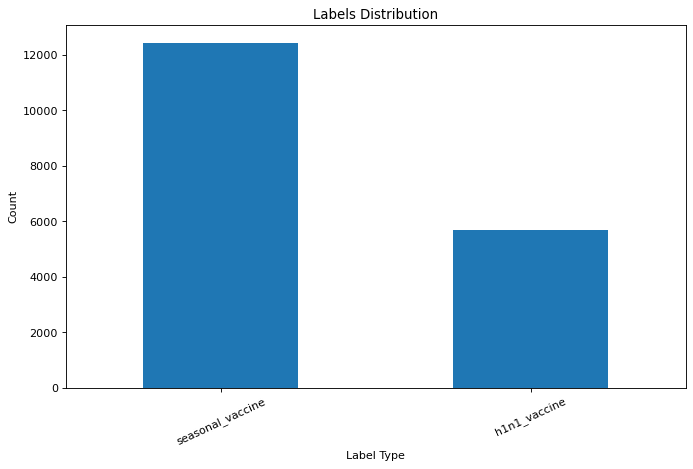

In [24]:
y_labels = tr_labels.sum().sort_values(ascending=False)


figure(figsize=(10, 6),dpi=80)
y_labels.plot(kind='bar')
plt.xticks(rotation=25)
plt.title('Labels Distribution')
plt.xlabel('Label Type')
plt.ylabel('Count')

-------------------------------
<b>3. Data Preprocessing</b>

In [25]:
print(df.info())
df.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53415 entries, 0 to 53414
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 53238 non-null  float64
 1   h1n1_knowledge               53177 non-null  float64
 2   behavioral_antiviral_meds    53265 non-null  float64
 3   behavioral_avoidance         52994 non-null  float64
 4   behavioral_face_mask         53377 non-null  float64
 5   behavioral_wash_hands        53333 non-null  float64
 6   behavioral_large_gatherings  53256 non-null  float64
 7   behavioral_outside_home      53251 non-null  float64
 8   behavioral_touch_face        53159 non-null  float64
 9   doctor_recc_h1n1             49095 non-null  float64
 10  doctor_recc_seasonal         49095 non-null  float64
 11  chronic_med_condition        51512 non-null  float64
 12  child_under_6_months         51782 non-null  float64
 13  health_worker   

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe


Change Feature Type and fill NaN values

In [26]:
categories = ['age_group',
             'education',
              'race',
              'sex',
              'income_poverty',
              'marital_status',
              'rent_or_own',
              'employment_status',
             'hhs_geo_region',
             'census_msa',  
              'employment_industry',
              'employment_occupation'
              ]

for item in categories:
    df[item] = df[item].fillna(value='None')
    df[item] = df[item].astype('category')

#Get numberic colls
numeric = df.drop(labels=categories,axis=1)
colls = np.array(numeric.columns)

for item in colls:
    df[item] = df[item].fillna(value=-1)
    df[item] = df[item].astype('category')
    
#ANALYSE NULLS
nulls = df.isna().sum().sort_values(ascending=False).sum()
nulls

0

In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53415 entries, 0 to 53414
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   h1n1_concern                 53415 non-null  category
 1   h1n1_knowledge               53415 non-null  category
 2   behavioral_antiviral_meds    53415 non-null  category
 3   behavioral_avoidance         53415 non-null  category
 4   behavioral_face_mask         53415 non-null  category
 5   behavioral_wash_hands        53415 non-null  category
 6   behavioral_large_gatherings  53415 non-null  category
 7   behavioral_outside_home      53415 non-null  category
 8   behavioral_touch_face        53415 non-null  category
 9   doctor_recc_h1n1             53415 non-null  category
 10  doctor_recc_seasonal         53415 non-null  category
 11  chronic_med_condition        53415 non-null  category
 12  child_under_6_months         53415 non-null  category
 13  h

----------------------------
<b>4. Export Preprocessed Dataframes</b>

In [28]:
df_test = df.iloc[26707:,:]
merged_df = df.iloc[:26707,:]

In [29]:
df = merged_df.merge(tr_labels,how='left',on='respondent_id')

In [30]:
#Split again df to train set and test set

df.to_csv('train_data.csv')
df_test.to_csv('test_data.csv')

In [31]:
#X = merged_df.copy()
#y_seasonal = tr_labels['seasonal_vaccine']